# УСР

<p style="text-align: right">Адамович Дмитрий</p>
<p style="text-align: right">БГУ, ММФ</p>
<p style="text-align: right">3курс, 4группа</p>

In [1]:
import numpy as np
import sympy as sp
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Точка на плоскости

### 1.1

Внутреннее представление объекта «точка»

In [2]:
class kmPoint:
    def __init__(self, name:str = "", coords:np.ndarray = np.array([0, 0])):
        """
        Создание точки из списка координат
        """
        self.coords = np.array(coords)
        self.name = name

    @classmethod
    def from_cylindrical(cls, name: str = "", rho: float = 0, phi: float = 0, z: float = 0):
        """
        Создает точку из цилиндрических координат.
        """
        x = rho * np.cos(phi)
        y = rho * np.sin(phi)
        coords = np.array([x, y, z])
        return cls(name, coords)

    @classmethod
    def from_spherical(cls, name: str = "", r: float = 0, theta: float = 0, phi: float = 0):
        """
        Создает точку из сферических координат.
        """
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        coords = np.array([x, y, z])
        return cls(name, coords)
    
    @property
    def name_(self) -> str:
        if self.name:
            return self.name
        return "Точка"

    def is_name(self) -> bool:
        return bool(self.name)
    
    @property
    def coords_(self) -> str:
        return self.coords

    def __repr__(self):
        '''
        return: Строковое представление точки
        '''
        return f'{self.name_} {tuple(self.coords)}'


In [3]:
a = kmPoint("A", (1,1))
b = kmPoint("B")
c = kmPoint()

### 1.4

Напишите оператор, возвращающий имя объекта «точка», если оно
существует.

In [4]:
a.name_, b.name_, c.name_

('A', 'B', 'Точка')

### 1.5

Напишите оператор, возвращающий координаты заданного объекта
«точка».

In [5]:
a.coords_, b.coords_, c.coords_

(array([1, 1]), array([0, 0]), array([0, 0]))

### 1.6

Постройте булеву функцию, позволяющую определить, имеет ли
представленный объект «точка» имя.

In [6]:
a.is_name(), b.is_name(), c.is_name()

(True, True, False)

### 1.7

Создайте функции, генерирующие печатный образ объекта «точка»

In [7]:
for point in [a,b,c]:
    print(point)

A (1, 1)
B (0, 0)
Точка (0, 0)


Пример точек не на декартовой плооскости

In [8]:
a2 = kmPoint("R^6", [1.,1.,1.,1.,1.,1.])
b2 = kmPoint.from_cylindrical("Цилиндрическая инициализация", 2, 1.5, 10)
c2 = kmPoint.from_spherical("Сферическая инициализация", 2, 1.5, 10)

a2, b2, c2

(R^6 (1.0, 1.0, 1.0, 1.0, 1.0, 1.0),
 Цилиндрическая инициализация (0.1414744033354058, 1.994989973208109, 10.0),
 Сферическая инициализация (-1.6739392873119188, -1.0853166614378293, 0.1414744033354058))

## 2 Вектор в простарнстве

## 2.1

Внутреннее представление объекта «вектор»

In [9]:
import math

In [10]:
class kmVector:
    def __init__(self, name: str = "", data = [0, 0]):
        """
        Инициализация вектора. Поддерживает создание:
        - По имени и координатам конечного вектора.
        - По двум точкам, определяющим вектор.
            
        Параметры:
        - name (str): Имя вектора.
        - data (list): либо [kmPoint, kmPoint], либо координаты конца вектора.
        """
        self.name = name
        if isinstance(data[0], kmPoint) and isinstance(data[1], kmPoint):
            # Если задан вектор через две точки
            self.coords = np.array(data[1].coords_ - data[0].coords_)
        else:
            self.coords = np.array(data)
            
    @property
    def name_(self) -> str:
        return self.name if self.name else "Вектор"
        
    @property
    def coords_(self) -> np.ndarray:
        return self.coords

    @property
    def length_(self):
        return np.sqrt(np.sum(self.coords_ ** 2))

    def is_name(self) -> bool:
        return bool(self.name)
    
    def __repr__(self):
        '''
        return: Строковое представление вектора
        '''
        return f'{self.name_} {tuple(self.coords)}'

### 2.3 - 2.4

Создайте конструкторы объекта «вектор», требующие указания
декартовых координат вектора и, возможно, его имени.


Задание 2.4
Создайте возможность задания объекта «вектор в пространстве» путем
указания координат концов направленного отрезка, определяющего этот
вектор (класс эквивалентных направленных отрезков), и, возможно, имени
вектора.

In [11]:
a = kmPoint("A", (1,1))
b = kmPoint("B")
vec1 = kmVector(name="Vec1", data=[3, 5])
vec2 = kmVector(name="Vec2", data=[a, b])
vec3 = kmVector(data=[7, 8, 1.1, 2, 5, 4])

### 2.5

Напишите оператор, возвращающий имя объекта «вектор».

In [12]:
vec1.name_, vec2.name_, vec3.name_

('Vec1', 'Vec2', 'Вектор')

### 2.6 

Напишите оператор, возвращающий координаты заданного объекта
«вектор».

In [13]:
vec1.coords_, vec2.coords_, vec3.coords_

(array([3, 5]), array([-1, -1]), array([7. , 8. , 1.1, 2. , 5. , 4. ]))

### 2.7

Напишите оператор, возвращающий длину заданного объекта «вектор».

In [14]:
vec1.length_, vec2.length_, vec3.length_

(5.830951894845301, 1.4142135623730951, 12.617844506887854)

### 2.8

Постройте булеву функцию, позволяющую определить, имеет ли
представленный объект «вектор» имя.

In [15]:
vec1.is_name(), vec2.is_name(), vec3.is_name()

(True, True, False)

### 2.9

Создайте функции, генерирующие печатный образ объекта «вектор».

In [16]:
print(vec1, vec2, vec3, sep='\n')

Vec1 (3, 5)
Vec2 (-1, -1)
Вектор (7.0, 8.0, 1.1, 2.0, 5.0, 4.0)


## 3 Плоскость в пространстве

Очевидно будем рисовать только 3д ($ R^3 $) ибо дальше никто не знает

### 3.1

Спроектируйте внутреннее представление объекта «плоскость в
пространстве».

In [17]:
a, b, c, d, x, y, z = sp.symbols('a b c d x y z')

In [18]:
from sympy import Matrix

In [19]:
class kmPlane:
    def __init__(self, name:str="", data = [0,0,0,0]):
        self.name = name
        self.coefs = np.array(data)

    @classmethod
    def from_expression(cls, name="", expr = a * x + b * y + c * z + d):
        coefs = expr.as_coefficients_dict()
        return cls(name, [coefs[x], coefs[y], coefs[z], coefs[1]])
    
    @classmethod
    def from_point_and_dir(cls, name = "", point = kmPoint("", [0,0,0]), dir = [kmVector(), kmVector]):
        l0 = np.array([x,y,z])
        #print(l0.shape, point.coords_)
        l1 = l0  - point.coords_
        l2 = dir[0].coords_
        l3 = dir[1].coords_

        #print(l1, l2, l3)
        
        matrix = sp.Matrix(np.column_stack((l1, l2, l3)))
        det = matrix.det()
        coefs = det.as_coefficients_dict() # достаю коэфиценты из опеределителя
        A = coefs[x]
        B = coefs[y]
        C = coefs[z]
        D = coefs[1]
        return cls(name, [A,B,C,D])

    @classmethod
    def from_3_points(cls, name, point1, point2, point3):
        return cls.from_point_and_dir(name, point1, [kmVector('', point2.coords_- point1.coords_), kmVector('', point3.coords_- point1.coords_)])

    @classmethod
    def from_point_and_normal(cls, name="", point = kmPoint(), normal = kmVector()):
        A, B, C = normal.coords_
        x_,y_,z_ = point.coords_
        return cls(name, [A, B, C, -(A*x_ + B*y_ + C*z_)]) #D = -(A*x + B*y +C*z)
    
    @property
    def name_(self):
        return self.name if self.name else"Плоскость"

    @property
    def coefs_(self):
        return self.coefs

    @property
    def expression_(self):
        a,b,c,d = self.coefs
        return a*x+b*y+c*z+d

    @property
    def normal_(self):
        a,b,c,_ = self.coefs
        return kmVector("", [a,b,c])

    def get_dir_vectors(self):
        x_ = np.random.randint(-10, 10)
        y_ = np.random.randint(-10, 10)
        a,b,c,d = self.coefs
        return kmVector("", [x_,0,-a*x_/c]), kmVector("", [0,y_,-b*y_/c])

    def get_three_points(self):
        points = []
        expr = self.expression_
        while len(points) < 3:
            x_ = random.randint(-10, 10)
            y_ = random.randint(-10, 10)
            z_ = random.randint(-10, 10)
            
            if expr.subs({x: x_, y: y_, z: z_}) == 0:
                points.append(kmPoint("", [x_, y_, z_]))
        return points
        
    def is_name(self):
        return bool(self.name)

    @property
    def plot_(self, xlim=(-10, 10), ylim=(-10, 10)):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x_ = np.linspace(xlim[0], xlim[1], 10)
        y_ = np.linspace(ylim[0], ylim[1], 10)
        X, Y = np.meshgrid(x_, y_)
        
        A, B, C, D = self.coefs
        
        if C != 0:
            Z = (-A * X - B * Y - D) / C
            ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)
        elif B != 0:
            Y = (-A * X - D) / B
            Z = np.linspace(-10, 10, 10)
            Y, Z = np.meshgrid(Y, Z)
            ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)
        elif A != 0:
            X = (-D) / A
            Y, Z = np.meshgrid(y, np.linspace(-10, 10, 10))
            ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)
        else:
            raise ValueError("Incorrect coefficients; the plane is undefined.")
        
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_zlim(-10, 10)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()
    
    def __repr__(self):
        return f'{self.name_} {self.expression_}'

In [20]:
plane1 = kmPlane("ABCD", [3,1,5,2])
plane2 = kmPlane(data=[7,12,-2,1])
plane3 = kmPlane()

### 3.2

Постройте булеву функцию is_name, позволяющую определить,
имеет ли представленный объект «плоскость в пространстве» имя.

In [21]:
plane1.is_name(), plane2.is_name(), plane3.is_name()

(True, False, False)

### 3.3

<img src="usr3.3.png">

### 3.7

Точка и 2 напрвляющих вектора

In [22]:
plane1 = kmPlane.from_point_and_dir("point and 2vectors", point=kmPoint("", [1,2,3]), dir=[kmVector("", [3,1,-2]), kmVector("", [-3, 4, 1])])
plane1

point and 2vectors 9*x + 3*y + 15*z - 60

### 3.8

по 3 точкам -> делаем по 1 точке и 2 векторам

In [23]:
plane2 = kmPlane.from_3_points("3points", kmPoint("", [1,1,1]), kmPoint("", [-2, 3, 1]), kmPoint("", [3,1,-5]))
plane2

3points -12*x - 18*y - 4*z + 34

### 3.6

по точке и нормали

In [24]:
plane3 = kmPlane.from_point_and_normal("point and normal", kmPoint("", [1,1,1]), kmVector("", [3,1,-2]))
plane3

point and normal 3*x + y - 2*z - 2

### 3.5

по выражению

In [25]:
x, y, z = sp.symbols('x y z')
plane4 = kmPlane.from_expression("", 3*x-2*y+z-4)
plane4

Плоскость 3*x - 2*y + z - 4

### 3.9

Напишите оператор, возвращающий имя объекта

In [26]:
plane1.name_

'point and 2vectors'

### 3.10

Напишите оператор, возвращающий список коэффициентов общего
уравнения плоскости.

In [27]:
plane1.coefs_

array([9, 3, 15, -60], dtype=object)

### 3.11

Напишите оператор, реализующий запрос общего уравнения
плоскости

In [28]:
plane1.expression_

9*x + 3*y + 15*z - 60

### 3.12

Напишите оператор, возвращающий нормальный вектор плоскости.

In [29]:
plane1.normal_

Вектор (9, 3, 15)

### 3.13

Напишите оператор, возвращающий два направляющих вектора
плоскости.

Направляющие векторы плоскости должны быть перпендикулярны этому нормальному вектору.

->

 Для этого решим систему уравнений:
$$ Ax+By+Cz=0 $$

возьмем в 1 векторе $x=random, y=0 => z=-Ax/C$,в 1 векторе $x=0, y=random => z=-By/C$

In [30]:
plane1.get_dir_vectors()

(Вектор (-1, 0, 3/5), Вектор (0, 5, -1))

### 3.16

3 рандомные точки из плоскости

In [31]:
plane1.get_three_points()

[Точка (7, -1, 0), Точка (4, -2, 2), Точка (5, -5, 2)]

### 3.14-3.15

Визуализация

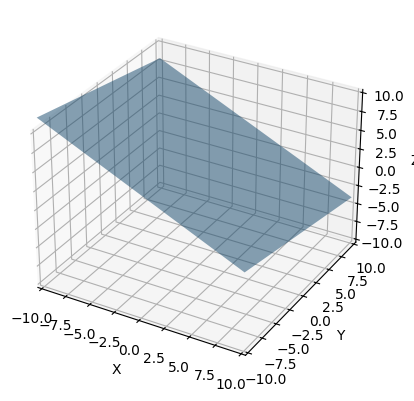

In [32]:
plane1.plot_

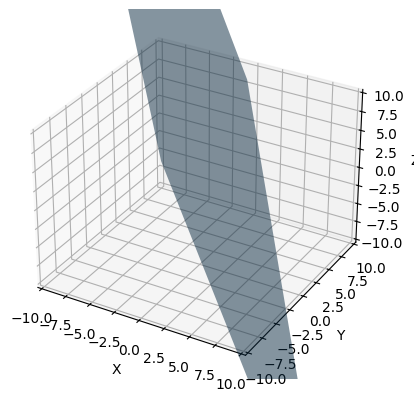

In [33]:
plane2.plot_

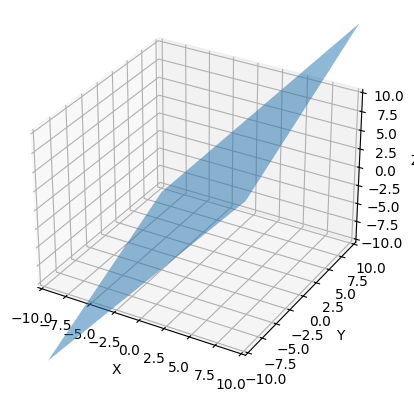

In [34]:
plane3.plot_

## 4 Прямая в пространстве

In [49]:
class kmLine:
    def __init__(self, name="", point=kmPoint(), direction_vector=kmVector()):
        self.point = point
        self.direction_vector = direction_vector
        self.name = name

    @property
    def point_(self):
        return self.point

    @property
    def direction_vector_(self):
        return self.direction_vector

    @property
    def name_(self):
        return self.name

    @property
    def equation_(self):
        x0, y0, z0 = self.point_.coords_
        dx, dy, dz = self.direction_vector_.coords_
        return f"(x, y, z) = ({x0}, {y0}, {z0}) + t * ({dx}, {dy}, {dz})"

    def __repr__(self):
        return f"{self.name_}: {self.equation_}" if self.name_  else f"Прямая: {self.equation_}" 

    @classmethod
    def from_points(cls, name="", P1=kmPoint(), P2=kmPoint):
        direction_vector = kmVector(name="Direction", data= P2.coords_ - P1.coords_)
        return cls(name, P1, direction_vector)

In [55]:
line = kmLine("", kmPoint("A", (1,1,1)), kmVector(name="Vec1", data=[3, 5, 7]))

In [51]:
line.point_

A (1, 1, 1)

In [52]:
line.direction_vector_

Vec1 (3, 5, 7)

In [54]:
line.equation_

'(x, y, z) = (1, 1, 1) + t * (3, 5, 7)'

In [56]:
line.name_

''

In [57]:
line2 = kmLine.from_points("", kmPoint("A", (1,1,1)), kmPoint("B", (-1,0,2)))

In [58]:
line2

Прямая: (x, y, z) = (1, 1, 1) + t * (-2, -1, 1)